In [18]:
from tensorflow import keras
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

# 필터의 가중치

- 입력 이미지의 2차원 영역에 적용되어 어떤 특징을 크게 두드러지게 표현하는 역할
    - 예) 물건의 테두리같은 특징적인 부분의 가중치는 높고 그 외 영역은 가중치가 낮게 

In [2]:
# 저장해둔 CNN 모델 불러오기
model = keras.models.load_model('./model/best-cnn-model.keras')

In [3]:
# 모델 층 확인
model.layers

[<Conv2D name=conv2d_1, built=True>,
 <MaxPooling2D name=max_pooling2d_2, built=True>,
 <Conv2D name=conv2d_2, built=True>,
 <MaxPooling2D name=max_pooling2d_3, built=True>,
 <Flatten name=flatten_1, built=True>,
 <Dense name=dense_2, built=True>,
 <Dropout name=dropout_1, built=True>,
 <Dense name=dense_3, built=True>]

In [4]:
# 첫 번째 합성곱 층의 가중치 확인
conv = model.layers[0]

In [8]:
conv.weights[0][0]

<tf.Tensor: shape=(3, 1, 32), dtype=float32, numpy=
array([[[-0.19267856, -0.18556857, -0.31948006,  0.15063305,
          0.00247132, -0.09422003, -0.12814507,  0.21650659,
         -0.6322966 , -0.09114772,  0.09132703,  0.02765252,
         -0.4119527 ,  0.1692646 ,  0.12964389,  0.09731767,
         -0.08330709, -0.1926731 ,  0.14400697, -0.27317277,
         -0.10383009,  0.14143027, -0.33515513,  0.16339183,
         -0.07539035,  0.10940597,  0.02464085, -0.14464776,
         -0.02967625, -0.02463762,  0.09768693, -0.00329836]],

       [[ 0.16921571, -0.7325735 ,  0.1556859 , -0.278838  ,
         -0.25992602, -0.63275063, -0.39189526,  0.24686126,
         -1.135507  ,  0.16735016, -0.01241929,  0.15255293,
         -0.22079156,  0.18742114,  0.04776847,  0.2620676 ,
          0.2049263 , -0.06667225, -0.06705862, -1.4135504 ,
         -0.06224138,  0.10987412, -0.24800718,  0.12790698,
         -0.03606968, -0.06929073, -0.02172839,  0.1647504 ,
          0.38200524,  0.06646

In [10]:
conv.weights[0].value

<tf.Variable 'conv2d_1/kernel:0' shape=(3, 3, 1, 32) dtype=float32, numpy=
array([[[[-1.92678556e-01, -1.85568571e-01, -3.19480062e-01,
           1.50633052e-01,  2.47132313e-03, -9.42200348e-02,
          -1.28145069e-01,  2.16506585e-01, -6.32296622e-01,
          -9.11477208e-02,  9.13270265e-02,  2.76525188e-02,
          -4.11952704e-01,  1.69264600e-01,  1.29643887e-01,
           9.73176733e-02, -8.33070949e-02, -1.92673102e-01,
           1.44006968e-01, -2.73172766e-01, -1.03830092e-01,
           1.41430274e-01, -3.35155129e-01,  1.63391829e-01,
          -7.53903538e-02,  1.09405972e-01,  2.46408470e-02,
          -1.44647762e-01, -2.96762474e-02, -2.46376172e-02,
           9.76869315e-02, -3.29836202e-03]],

        [[ 1.69215709e-01, -7.32573509e-01,  1.55685902e-01,
          -2.78838009e-01, -2.59926021e-01, -6.32750630e-01,
          -3.91895264e-01,  2.46861264e-01, -1.13550699e+00,
           1.67350158e-01, -1.24192862e-02,  1.52552933e-01,
          -2.20791563e-0

In [7]:
conv.weights[0].shape, conv.weights[1].shape

(TensorShape([3, 3, 1, 32]), TensorShape([32]))

- conv.weights[0]
    - 가중치
    - 가중치의 크기
        - 커널의 크기 : (3, 3, 1)
        - 필터의 개수 : 32
        
- conv.weights[1]
    - 절편의 개수 = 필터의 개수 

In [11]:
conv_weights = conv.weights[0].numpy()
conv_weights

array([[[[-1.92678556e-01, -1.85568571e-01, -3.19480062e-01,
           1.50633052e-01,  2.47132313e-03, -9.42200348e-02,
          -1.28145069e-01,  2.16506585e-01, -6.32296622e-01,
          -9.11477208e-02,  9.13270265e-02,  2.76525188e-02,
          -4.11952704e-01,  1.69264600e-01,  1.29643887e-01,
           9.73176733e-02, -8.33070949e-02, -1.92673102e-01,
           1.44006968e-01, -2.73172766e-01, -1.03830092e-01,
           1.41430274e-01, -3.35155129e-01,  1.63391829e-01,
          -7.53903538e-02,  1.09405972e-01,  2.46408470e-02,
          -1.44647762e-01, -2.96762474e-02, -2.46376172e-02,
           9.76869315e-02, -3.29836202e-03]],

        [[ 1.69215709e-01, -7.32573509e-01,  1.55685902e-01,
          -2.78838009e-01, -2.59926021e-01, -6.32750630e-01,
          -3.91895264e-01,  2.46861264e-01, -1.13550699e+00,
           1.67350158e-01, -1.24192862e-02,  1.52552933e-01,
          -2.20791563e-01,  1.87421143e-01,  4.77684699e-02,
           2.62067586e-01,  2.04926297

In [12]:
# 가중치의 평균과 표준편차
print(conv_weights.mean(), conv_weights.std())

-0.03694755 0.26615623


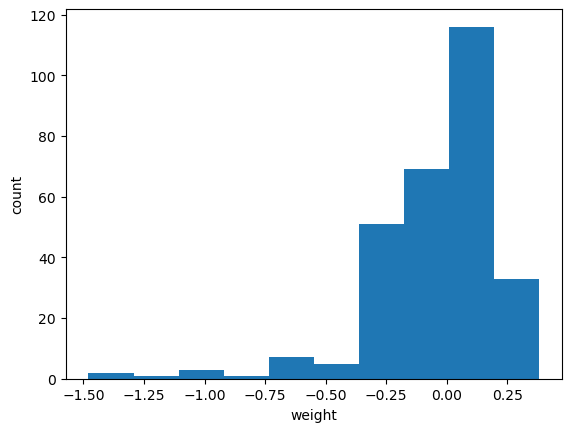

In [13]:
# 가중치 히스토그램
plt.figure()

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- 0을 중심으로 종 모양의 분포 

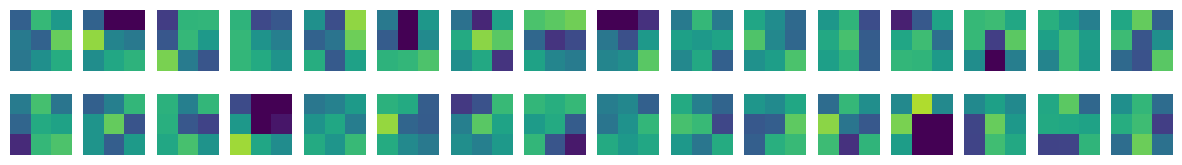

In [15]:
# 32개의 커널을 모두 시각화

# 2행 16열로 
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
        
plt.show()

- 밝은 부분이 높은 값
    - 가중치가 높은 영역에 이미지가 겹치면 크게 활성화됨
        - 예) 오른쪽 세로로 한 줄의 가중치가 높다면 오른쪽에 놓인 직선을 만나면 크게 활성화 
        
- i : 행 인덱스(0 ~ 1)
- j : 열 인덱스(0 ~ 15)
    - conv_weights[:, :, 0, 0] 부터 conv_weights[:, :, 0, 31]까지 출력
    
- imshow()
    - 배열의 최댓값과 최솟값으로 픽셀의 강도를 표현
        - 배열의 최댓값은 가장 밝은색으로
        - 배열의 최솟값은 가장 어두운 색으로 표현
        
    - vmax, vmin
        - 컬러맵으로 표현할 색의 범위 지정 

# 훈련하지 않은 빈 합성곱 신경망과 비교 

In [19]:
no_training_model = keras.Sequential()
no_training_model.add(keras.layers.Conv2D(32, kernel_size = 3, activation = 'relu',
                                          padding = 'same', input_shape = (28, 28, 1)))

In [20]:
# 훈련하지 않은 빈 합성곱 층의 가중치를 저장
no_training_conv = no_training_model.layers[0]
print(no_training_conv.weights[0].shape)

(3, 3, 1, 32)


In [21]:
no_training_weights = no_training_conv.weights[0].numpy()
print(no_training_weights.mean(), no_training_weights.std())

-0.0018640573 0.08562804


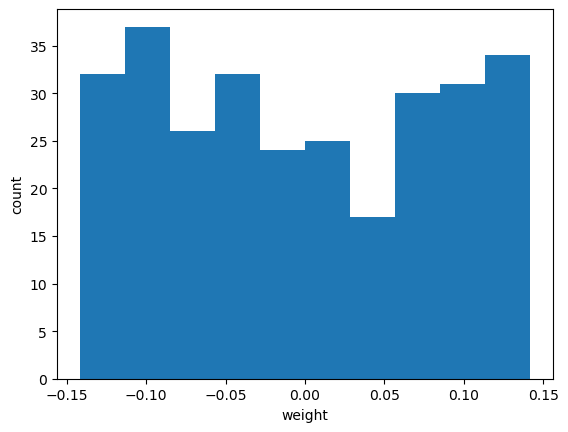

In [23]:
# 빈 합성곱 층 히스토그램
plt.figure()
plt.hist(no_training_weights.reshape(-1, 1))

plt.xlabel('weight')
plt.ylabel('count')
plt.show()

- 대부분의 가중치가 -0.15 부터 0.15 까지 고르게 분포함
    - 텐서플로에서 가중치를 초기화할 때 균등 분포에서 랜덤하게 값을 선택하기 때문에

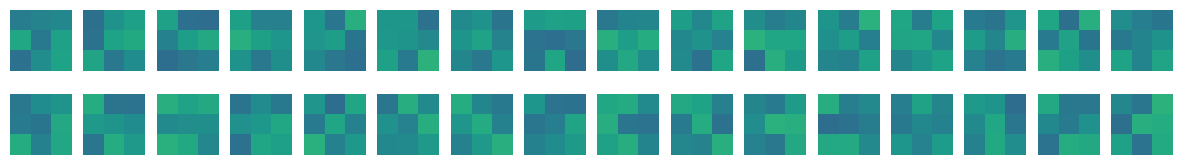

In [25]:
# 32개의 터널을 모두 시각화
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(no_training_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
        
plt.show()

- 훈련된 모델에 비해 패턴이 뚜렷하지 않음
- 위에 그래프에 비해 뚜렷하지 않음

# 케라스의 함수형 API

- Sequential 클래스 : 층을 차례대로 쌓은 단순한 모델을 구성
- 복잡한 모델은 구성하기 힘들기 때문에 함수형 API(functional API)를 사용
- 케라스의 Model 클래스를 사용하여 모델을 생성 
- layers 객체를 함수처럼 호출하여 동작 

## 함수형 API로 다층 퍼셉트론 모델 구현 예제 

In [26]:
# 입력층 생성
inputs = keras.Input(shape = (784, ))

- Sequential 클래스는 InputLayer 클래스를 자동으로 추가하고 호출
- Model 클래스는 입력층을 수동으로 만들어서 호출해야 함 

In [27]:
# 은닉층과 출력층 객체 생성
dense1 = keras.layers.Dense(100, activation = 'sigmoid')
dense2 = keras.layers.Dense(10, activation = 'softmax')

In [28]:
# 은닉층 호출
hidden = dense1(inputs)

- inputs를 Dense층에 통과시킨 후 출력값 hidden을 만드는 구조 생성

In [29]:
# 출력층 호출
outputs = dense2(hidden)

In [30]:
# Model 클래스로 inputs 와 outputs 를 연결 
test_model = keras.Model(inputs, outputs)

In [31]:
test_model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │          78,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

## 합성곱 신경망 모델 특성맵 시각화 

- 함수형 API를 이용해 첫 번째 합성곱 층의 출력(특성맵)을 시각화

In [35]:
# 합성곱 모델의 입력
print(model.inputs)

[<KerasTensor shape=(None, 28, 28, 1), dtype=float32, sparse=False, name=input_layer>]


In [36]:
# 합성곱층과 입력층을 함수형 API로 연결
conv_acti = keras.Model(model.inputs, model.layers[0].output)

In [37]:
conv_acti.summary()

Model: "functional_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 320 (1.25 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
# 데이터 준비
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

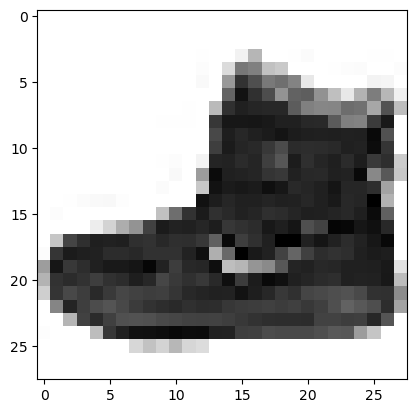

In [39]:
plt.figure()
plt.imshow(x_train[0], cmap = 'gray_r')
plt.show()

In [40]:
# 위의 데이터를 첫 번째 합성곱 층에 통과 
inputs = x_train[[0]].reshape(-1, 28, 28, 1) / 255

In [41]:
feature_maps = conv_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


In [42]:
print(feature_maps.shape)

(1, 28, 28, 32)


- 세임 패딩과 32개의 필터를 사용한 합성곱층의 출력이기 때문에 (28, 28, 32)
- 첫 번째 차원은 배치 차원
    - 샘플 하나만 입력했기 때문에 1 

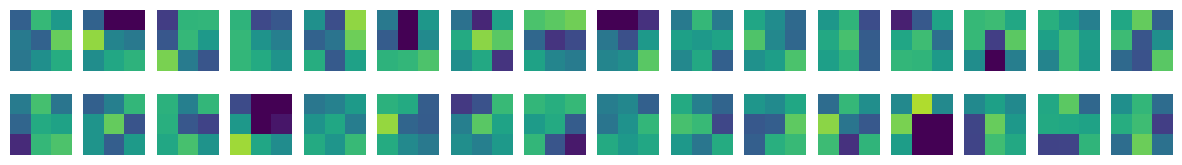

In [47]:
# 32개의 커널을 모두 시각화

# 2행 16열로 
fig, axs = plt.subplots(2, 16, figsize = (15, 2))

for i in range(2):
    for j in range(16):
        axs[i, j].imshow(conv_weights[:, :, 0, i * 16 + j], vmin = -0.5, vmax = 0.5)
        axs[i, j].axis('off')
        
plt.show()

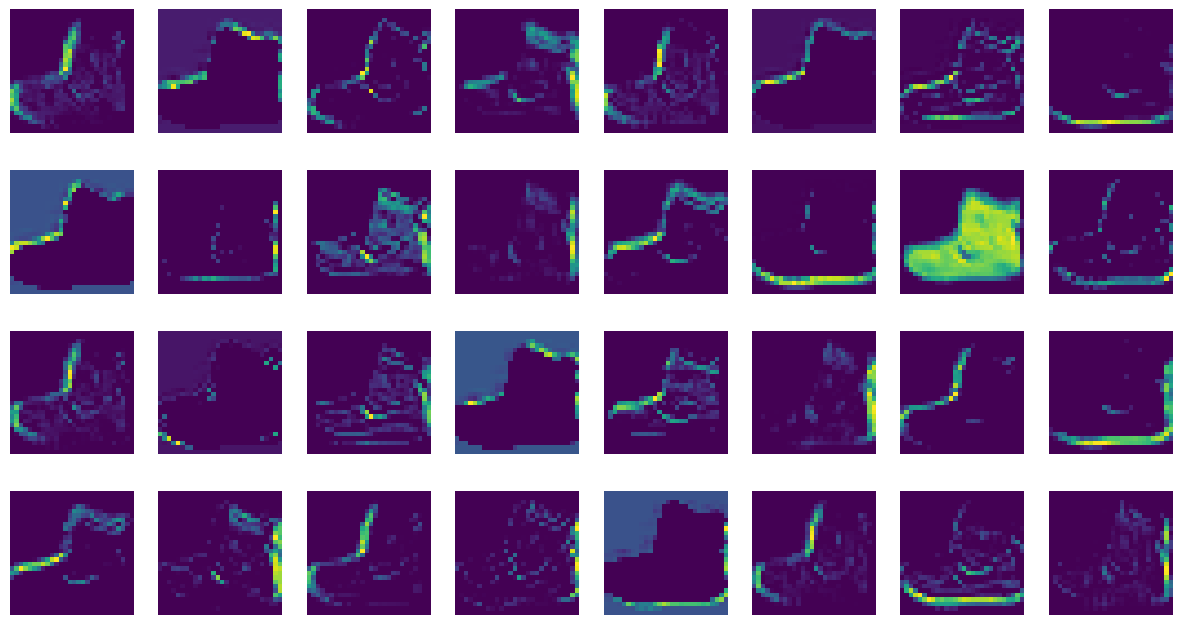

In [46]:
# 32개의 특성맵을 모두 시각화
fig, axs = plt.subplots(4, 8, figsize = (15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
        
plt.show()

- 32개의 필터로 인해 입력 이미지에서 강하게 활성화된 부분들을 시각화
    - 필터가 수직선을 감지한다면 부분이 강하게 활성화 
    - 전체적으로 모두 감지하는 필터는 아이템의 전체를 활성화
    - 전체적으로 음수값인 필터는 배경과 같은 0에 가까운 값과 곱해지면 작은 음수, 큰 수가 곱해지면 큰 음수가 됨
        - 배경을 잘 활성화 

In [48]:
# 두 번째 합성곱 층의 특성 맵 확인
conv2_acti = keras.Model(model.inputs, model.layers[2].output)

In [49]:
feature_maps = conv2_acti.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


In [50]:
print(feature_maps.shape)

(1, 14, 14, 64)


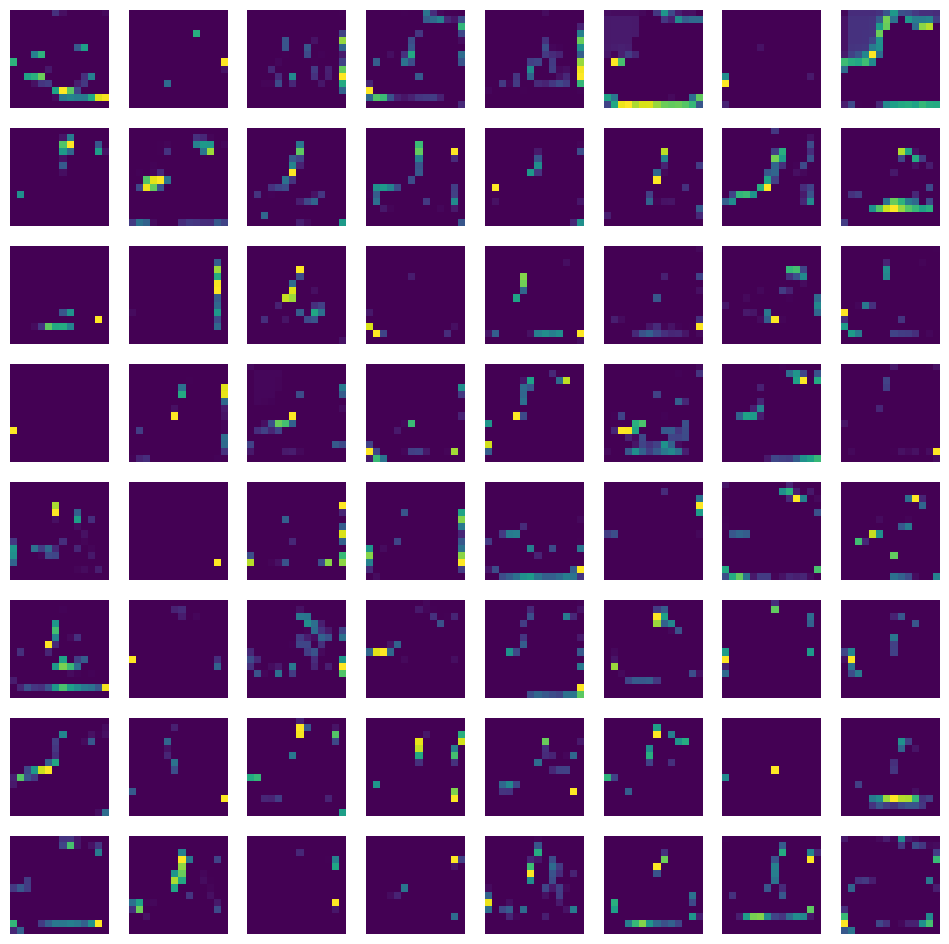

In [52]:
fig, axs = plt.subplots(8, 8, figsize = (12, 12))

for i in range(8):
    for j in range(8):
        axs[i, j].imshow(feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
        
plt.show()

- 특성맵을 시각적으로 이해하기 난해함
    - 합성곱 층을 많이 쌓을 수록 난해해짐 
    - 앞부분의 합성곱 층은 이미지의 시각적인 정보를 감지하고
    - 뒷부분의 합성곱 층은 앞쪽에서 감지한 시각적인 정보를 바탕으로 추상적인 정보를 학습 

## 풀링 결과물 비교 

In [53]:
pool_model = keras.Model(model.inputs, model.layers[1].output)

In [54]:
pool_feature_maps = pool_model.predict(inputs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


In [55]:
print(pool_feature_maps.shape)

(1, 14, 14, 32)


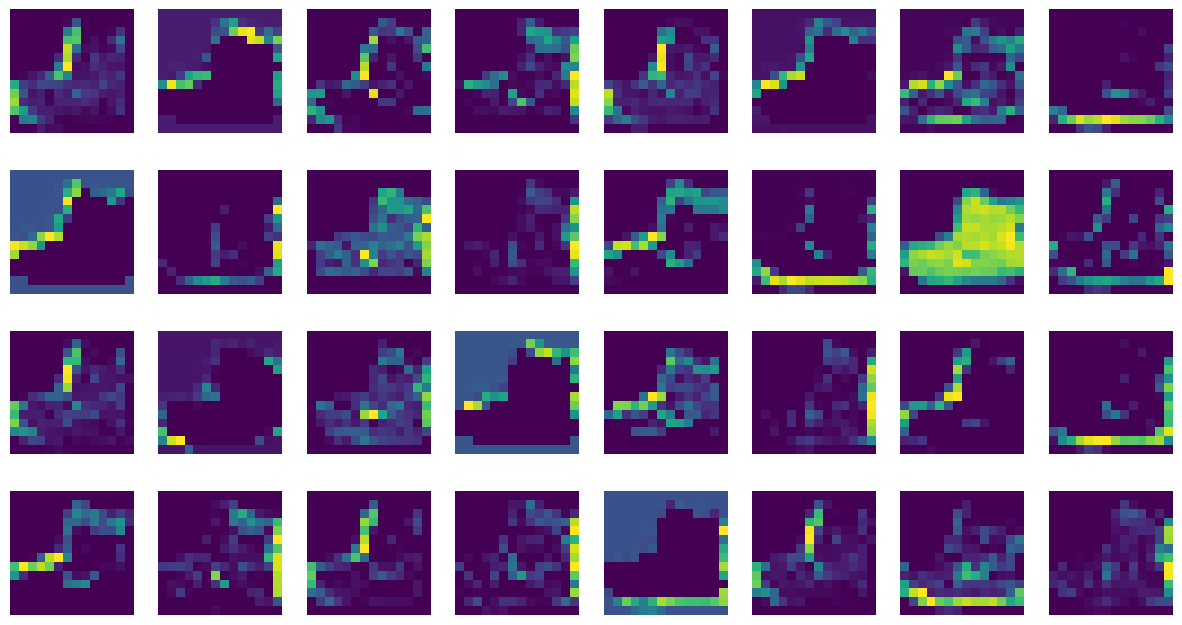

In [57]:
# 32개의 풀링 특성맵을 모두 시각화
fig, axs = plt.subplots(4, 8, figsize = (15, 8))

for i in range(4):
    for j in range(8):
        axs[i, j].imshow(pool_feature_maps[0, :, :, i * 8 + j])
        axs[i, j].axis('off')
        
plt.show()

- 풀링 꽤 괜찮게 됨